_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍕

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [227]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

#### Run this cell to load the data:

In [228]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url, index_col=0)
test  = pd.read_csv(test_url, index_col=0)

#assert train.shape == (51916, 16)
#assert test.shape  == (17306, 16)

I stopped the shape assertion due to import errors. This is also why I deleted the index to each file.

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Confusion Matrix
- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make four of these visualization types._

## Part 1: Preprocessing

> You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

In [229]:
test.shape

(17306, 16)

In [230]:
train.shape

(51916, 16)

In [231]:
test.head()

,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
Inspection ID,,,,,,,,,,,,,,,,
114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1


#Errors

I am consistently getting this type of error message. I have spent an hour and only been able to download the file a couple of times without issue. I should be able to run my cells over again without having to deal with this to complete the sprint challenge I think:


</style><script nonce="ojr1HYLTdP14EVOafnP5LA"></script></head><body><div id=gbar><nobr><a target=_blank class=gb1 href="https://www.google.com/webhp?tab=ow">Search</a> <a target=_blank class=gb1 href="http://www.google.com/imghp?hl=en&tab=oi">Images</a> <a target=_blank class=gb1 href="https://maps.google.com/maps?hl=en&tab=ol">Maps</a> <a target=_blank class=gb1 href="https://play.google.com/?hl=en&tab=o8">Play</a> <a target=_blank class=gb1 href="https://www.youtube.com/?gl=US&tab=o1">YouTube</a> <a target=_blank class=gb1 href="https://news.google.com/nwshp?hl=en&tab=on">News</a> <a target=_blank class=gb1 href="https://mail.google.com/mail/?tab=om">Gmail</a> <b class=gb1>Drive</b> <a target=_blank class=gb1 style="text-decoration:none" href="https://www.google.com/intl/en/about/products?tab=oh"><u>More</u> &raquo;</a></nobr></div><div id=guser width=100%><nobr><span id=gbn class=gbi></span><span id=gbf class=gbf></span><span id=gbe></span><a target="_self" href="/settings?hl=en_US" class=gb4>Settings</a> | <a target=_blank href="//support.google.com/drive/?p=web_home&hl=en_US" class=gb4>Help</a> | <a target=_top id=gb_70 href="https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://drive.google.com/uc%3Fexport%3Ddownload%26id%3D13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5&service=writely" class=gb4>Sign in</a></nobr></div><div class=gbh style=left:0></div><div class=gbh style=right:0></div><div class="uc-main"><div id="uc-dl-icon" class="image-container"><div class="drive-sprite-aux-download-file"></div></div><div id="uc-text"><p class="uc-warning-caption">Google Drive can't scan this file for viruses.</p><p class="uc-warning-subcaption">We are experiencing technical difficulties. Would you still like to download this file? <span class="uc-name-size"><a href="https://drive.google.com/open?id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5">food-inspections-train.csv</a> (61M)</span></p><a id="uc-download-link" class="goog-inline-block jfk-button jfk-button-action" href="/uc?export=download&amp;confirm=5Nm7&amp;id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5">Download anyway</a></div></div><div class="uc-footer"><hr class="uc-footer-divider">&copy; 2020 Google - <a class="goog-link" href="//support.google.com/drive/?p=web_home">Help</a> - <a class="goog-link" href="//support.google.com/drive/bin/answer.py?hl=en_US&amp;answer=2450387">Privacy & Terms</a></div></body></html>	

In [232]:
train.head()

,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
Inspection ID,,,,,,,,,,,,,,,,
2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


Examine Facility Type as a good feature to re-engineer. Looks like it could be a categorical value but is likely full of random stuff.

In [233]:
y = train['Facility Type']
print(y.nunique()) #this finds number of unique values
print(y.unique()) #this generates the contents of the array of unique values

329
['Restaurant' 'Grocery Store' 'School' 'Long Term Care' 'Liquor'
 'Daycare Above and Under 2 Years' "Children's Services Facility"
 'Catering' 'Daycare Night' 'CHURCH' 'GAS STATION/STORE'
 'Daycare (2 - 6 Years)' 'Mobile Food Preparer' 'Golden Diner' 'TAVERN'
 'ICE CREAM SHOP' 'Banquet Hall' 'coffee shop' 'Bakery'
 'SLAUGHTER HOUSE/ GROCERY' 'RESTAURANT/GROCERY STORE'
 'Shared Kitchen User (Long Term)' 'Daycare (Under 2 Years)' 'Wholesale'
 'Mobile Food Dispenser' nan 'Daycare Combo 1586' 'Hospital' 'STORE'
 'Airport Lounge' 'LIVE POULTRY' 'tavern' 'REPACKAGING PLANT'
 'Daycare (2 Years)' 'Mobile Prepared Food Vendor' 'CHURCH KITCHEN'
 'GROCERY/GAS STATION' 'GAS STATION STORE' 'BAR' 'Navy Pier Kiosk'
 'STADIUM' 'Special Event' 'KIOSK' 'RETAIL STORE' 'CATERING/CAFE'
 'GROCERY/RESTAURANT' 'MOVIE THEATRE' 'Shared Kitchen' 'DAYCARE'
 'TEA BREWING' 'Long-Term Care' "1023-CHILDREN'S SERVICES FACILITY"
 'convenience store' 'GAS STATION' 'Private School' 'COMMISSARY'
 'COFFEE KIOSK' 'CONVE

In [234]:
train['Facility Type'].isnull().sum()

224

In [235]:
train.isnull().sum()

DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

Dropping rows which contain Nan in 'Facility Type'

In [236]:
train = train[train['Facility Type'].notnull()]

In [237]:
columns = ['City','AKA Name','License #','State','Zip','Violations','Latitude','Longitude','Location']

Re-engineering the 'Facility Type' column. This was done hunt and peck. If I had time I'd build a function for this.

In [238]:
train['Facility Type'] = train['Facility Type'].str.lower()

daycare = train['Facility Type'].str.contains('daycare')
store = train['Facility Type'].str.contains('store')
restuarant = train['Facility Type'].str.contains('restuarant')
grocery = train['Facility Type'].str.contains('grocery')
cafeteria = train['Facility Type'].str.contains('cafeteria')
bar = train['Facility Type'].str.contains('bar')
coffee = train['Facility Type'].str.contains('coffee')
assisted = train['Facility Type'].str.contains('assist')
shop = train['Facility Type'].str.contains('shop')
care = train['Facility Type'].str.contains('care')
nursing = train['Facility Type'].str.contains('nursing')
club = train['Facility Type'].str.contains('club')
kitchen = train['Facility Type'].str.contains('kitchen')
cafe = train['Facility Type'].str.contains('cafe')
school = train['Facility Type'].str.contains('school')
dcare = train['Facility Type'].str.contains('day care')
hall = train['Facility Type'].str.contains('hall')
venue = train['Facility Type'].str.contains('venue')
diner = train['Facility Type'].str.contains('diner')
bakery = train['Facility Type'].str.contains('bakery')
rooftop = train['Facility Type'].str.contains('rooftop')
gasstation = train['Facility Type'].str.contains('gas station')

train.loc[daycare, 'Facility Type'] = 'Daycare'
train.loc[store, 'Facility Type'] = 'Store'
train.loc[restuarant, 'Facility Type'] = 'Restuarant'
train.loc[grocery, 'Facility Type'] = 'Grocery'
train.loc[cafeteria, 'Facility Type'] = 'Cafeteria'
train.loc[bar, 'Facility Type'] = 'Bar'
train.loc[coffee, 'Facility Type'] = 'Coffee'
train.loc[assisted, 'Facility Type'] = 'Assisted Living'
train.loc[shop, 'Facility Type'] = 'Shop'
train.loc[nursing, 'Facility Type'] = 'Assisted Living'
train.loc[club, 'Facility Type'] = 'Club'
train.loc[kitchen, 'Facility Type'] = 'Kitchen'
train.loc[cafe, 'Facility Type'] = 'Cafe'
train.loc[school, 'Facility Type'] = 'School'
train.loc[dcare, 'Facility Type'] = 'Daycare'
train.loc[hall, 'Facility Type'] = 'Venue'
train.loc[venue, 'Facility Type'] = 'Venue'
train.loc[diner, 'Facility Type'] = 'Diner'
train.loc[bakery, 'Facility Type'] = 'Bakery'
train.loc[rooftop, 'Facility Type'] = 'Rooftop'
train.loc[gasstation, 'Facility Type'] = 'Gas Station'

In [239]:
facilities = ['Gas Station','Rooftop','Bakery','Diner','Venue','Daycare',
             'School','Cafe','Kitchen','Club','Assisted Living','Shop',
             'Coffee','Bar','Cafeteria','Grocery','Restuarant','Store',
             'Daycare']

Selecting only those rows in train which have been standardized through my re-engineering

In [240]:
train = train[train['Facility Type'].isin(facilities)]

In [241]:
train['Facility Type'].value_counts()

Grocery            6994
School             3937
Daycare            1816
Bakery              861
Diner               162
Kitchen             127
Gas Station          83
Store                59
Venue                52
Cafe                 39
Bar                  37
Shop                 27
Rooftop              19
Assisted Living      13
Coffee                9
Club                  4
Name: Facility Type, dtype: int64

In [242]:
train.shape

(14239, 16)

Original shape of train was (51916, 16). Now it's (14239, 16). Shouldn't matter as I still have lots of data and my goal is to make as quick of a model as I can before fine tuning.

In [243]:
train.head()

,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
Inspection ID,,,,,,,,,,,,,,,,
555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0
1516695,PETE'S MARKET,PETE'S MARKET,36823.0,Grocery,Risk 1 (High),5724 S KEDZIE AVE,CHICAGO,IL,60629.0,2015-11-30T00:00:00,Complaint,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.789113,-87.703580,"{'longitude': '-87.70357972660756', 'latitude'...",0
1982990,MARK TWAIN ELEMENTARY,MARK TWAIN ELEMENTARY,25661.0,School,Risk 1 (High),5134 S LOTUS,CHICAGO,IL,60638.0,2017-02-10T00:00:00,Canvass Re-Inspection,NaN,41.799052,-87.758965,"{'longitude': '-87.75896524463428', 'latitude'...",0
519292,CITGO GAS,CITGO GAS,2093475.0,Grocery,Risk 2 (Medium),4064-4070 N CLARK ST,CHICAGO,IL,60613.0,2011-11-01T00:00:00,Complaint,NaN,41.956094,-87.663477,"{'longitude': '-87.66347696035288', 'latitude'...",0


In [244]:
from sklearn.model_selection import train_test_split

## Part 2: Modeling

> **Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.
>
> Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

In [245]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['Facility Type'], random_state=42)

In [246]:
print(train.shape, val.shape, test.shape)

(11391, 16) (2848, 16) (17306, 16)


In [247]:
target = 'Fail'
features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [248]:
y_train.value_counts(normalize=True)

0    0.735142
1    0.264858
Name: Fail, dtype: float64

Baseline is the 74% of the time food handling entities pass their inspections.

In [249]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 1.0
Validation Accuracy 0.7212078651685393


Validation accuracy of the model is less than random throws of the dice.

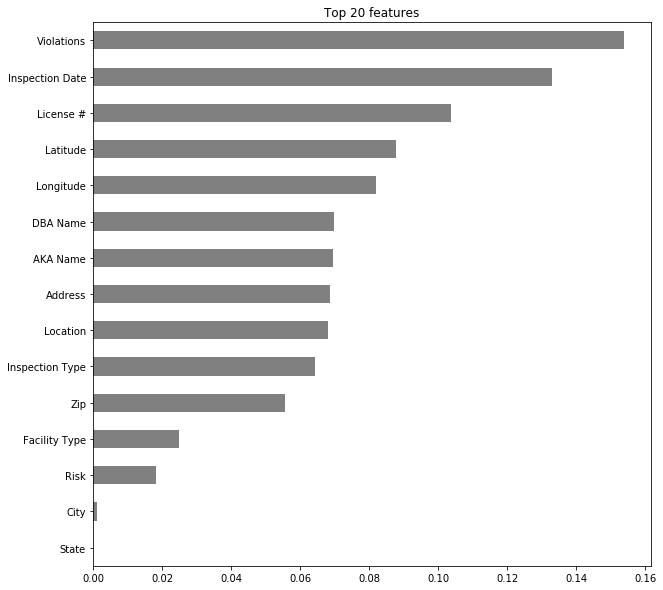

In [250]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [251]:
column  = 'Violations'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without Violations: 0.7015449438202247
Validation Accuracy with Violations: 0.7212078651685393
Drop-Column Importance for Violations: 0.0196629213483146


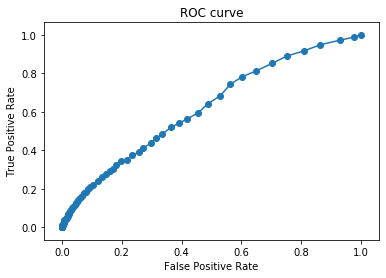

In [252]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = pipeline.predict_proba(X_val)[:, -1] # Probability for the last class
roc_auc_score(y_val, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})


import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

As you can see the curve here is barely above the center. So there is some value in the ROC curve but not very much. Clearly more work needs to be done on the model.

## Part 3: Visualization

> Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:
>
> - Permutation Importances
> - Partial Dependence Plot, 1 feature isolation
> - Partial Dependence Plot, 2 features interaction
> - Shapley Values

In [253]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.


In [254]:
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [255]:

import eli5
from eli5.sklearn import PermutationImportance

# 1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [256]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Location          -0.001826
Longitude         -0.001053
Address           -0.000913
Violations        -0.000843
DBA Name          -0.000772
Latitude          -0.000632
City               0.000000
State              0.000000
AKA Name           0.000140
Zip                0.002037
Risk               0.002388
Inspection Date    0.002528
License #          0.003090
Facility Type      0.003792
Inspection Type    0.004705
dtype: float64

In [257]:
eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names # must be a list
)

Weight,Feature
0.0047 ± 0.0033,Inspection Type
0.0038 ± 0.0027,Facility Type
0.0031 ± 0.0040,License #
0.0025 ± 0.0026,Inspection Date
0.0024 ± 0.0020,Risk
0.0020 ± 0.0029,Zip
0.0001 ± 0.0015,AKA Name
0 ± 0.0000,State
0 ± 0.0000,City
-0.0006 ± 0.0025,Latitude


This seems to clearly show that none of the features really are that important. Inspection Type is the closest to having some importance but it's only just at the 50% threshold from the weight. Seems to me that a lot of detailed work needs to be done on the data set to clean and organize it better to build a better model.

In [258]:
pip install PDPbox

Note: you may need to restart the kernel to use updated packages.


In [259]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [260]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 -0.06459304402266719


In [261]:
import matplotlib.pyplot as plt

In [262]:
features

Index(['DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address',
       'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type',
       'Violations', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [263]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'License #'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a401c4e50>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a37fea050>})

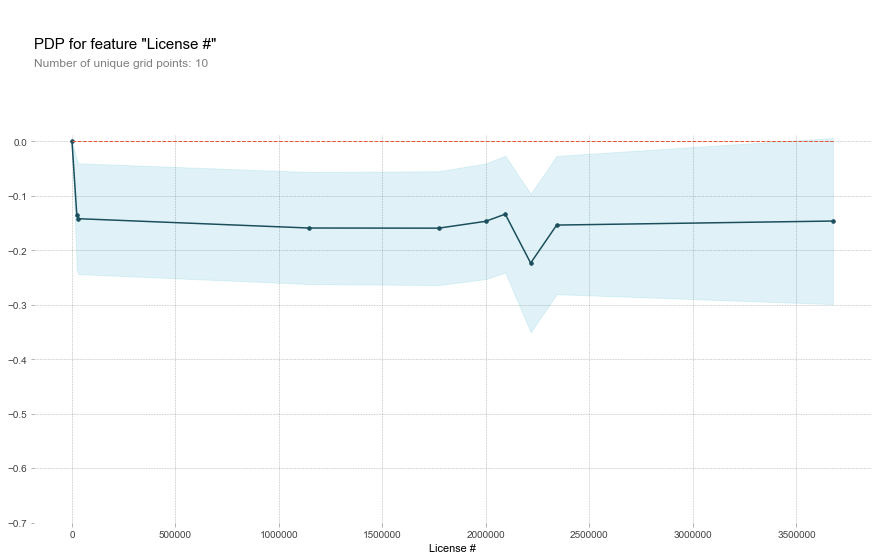

In [264]:
pdp_plot(isolated, feature_name=feature)

#Wrap Up

I believe I fulfilled all the requirements of the sprint challenge. I cleaned and organized data, engineered features, created a model, and then created visualizations of some of the results.

The model is not worth much as it generally doesn't perform better than random throws of the dice. But that's ok.

This would all be a first step. The next iteration I would do a number of things.

1. The inspection type of 'Complaint Re-Inspection' & 'Canvas Re-Inspection' are almost assuredly the source of data leakage. I would conjecture that removing rows which contain these types of inspections would remove data leakage from the data and help me to build a better model.
2. I would do more work towards re-engineering the 'Facility Type' to include more of the rows.
3. Knowing now, based on this iteration of analysis, that the 'Violations' row carries the most importance to the model I would attempt to engineer new features based on this: for instance, faulty building code violations are distinctly different from leaves food out on counter type violations. I'd want to learn more about this by analyzing the value_counts of this column and perhaps make some changes to the model based on this.
4. I would attend more closely to the nulls & Nans in the dataframes. In my model I ignored most of them and could most assuredly do a better job with the model if I attended to these through some kind of interpretation or substitution scheme.